In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os
import seaborn as sns

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

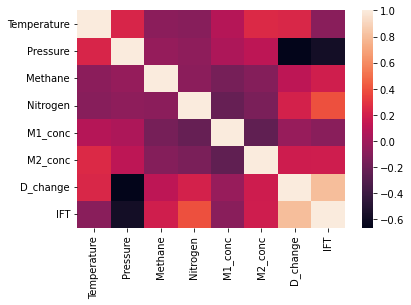

In [3]:
sns.heatmap(df.corr())

In [4]:
X= df. drop(['IFT','Phase'],axis=1)

In [5]:
y=df.IFT.astype(float)

In [6]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype']
X_categorical=One_hot.fit_transform(X[categorical])
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))
X.index=x_cat.index
X=pd.concat([X,x_cat],axis=1)
X

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,Salttype,D_change,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,27.00,5.070,0.0,0.0,0.0,0.045,CaCl,0.88170,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.00,6.030,0.0,0.0,0.0,0.045,CaCl,0.82990,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.00,7.020,0.0,0.0,0.0,0.045,CaCl,0.30280,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.00,8.270,0.0,0.0,0.0,0.045,CaCl,0.25460,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.00,11.050,0.0,0.0,0.0,0.045,CaCl,0.19770,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,99.95,10.978,0.0,0.0,4.9,0.000,NaClKCl,0.91568,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,99.95,11.962,0.0,0.0,4.9,0.000,NaClKCl,0.88873,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,99.95,12.974,0.0,0.0,4.9,0.000,NaClKCl,0.85951,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,99.95,13.964,0.0,0.0,4.9,0.000,NaClKCl,0.83316,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
X=X.drop(["Salttype"],axis=1)
y.index=X.index

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

Using TensorFlow backend


C:\Users\Paa Kwasi\AppData\Local\Temp\ipykernel_23920\3796592592.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [29]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))

    optimizer = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=7,
    directory="C:/Users/Paa Kwasi/Desktop/Interfacial tension research",
    project_name='IFT_project_2'
)    

Reloading Tuner from C:/Users/Paa Kwasi/Desktop/Interfacial tension research\IFT_project_2\tuner0.json


In [30]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

In [31]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
#num_epochs = best_hps.get('epochs')

In [32]:
print(best_hps.values)

{'units': 320, 'learning_rate': 0.0001}


In [33]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('val_mse')<1.5:
            self.model.stop_training=True

In [34]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000,callbacks=Mycallback())

Epoch 1/5000
39/39 [==============================] - 2s 14ms/step - loss: 1755.1139 - mse: 1755.1139 - mae: 40.2648 - val_loss: 1553.2935 - val_mse: 1553.2935 - val_mae: 37.6663
Epoch 2/5000
39/39 [==============================] - 0s 7ms/step - loss: 1013.3796 - mse: 1013.3796 - mae: 28.5079 - val_loss: 133.9701 - val_mse: 133.9701 - val_mae: 8.3190
Epoch 3/5000
39/39 [==============================] - 0s 9ms/step - loss: 109.2667 - mse: 109.2667 - mae: 7.9849 - val_loss: 80.6250 - val_mse: 80.6250 - val_mae: 6.6442
Epoch 4/5000
39/39 [==============================] - 0s 8ms/step - loss: 64.8213 - mse: 64.8213 - mae: 6.0002 - val_loss: 62.5397 - val_mse: 62.5397 - val_mae: 5.9800
Epoch 5/5000
39/39 [==============================] - 0s 8ms/step - loss: 50.5829 - mse: 50.5829 - mae: 5.2991 - val_loss: 48.2479 - val_mse: 48.2479 - val_mae: 5.2979
Epoch 6/5000
39/39 [==============================] - 0s 8ms/step - loss: 39.9806 - mse: 39.9806 - mae: 4.7450 - val_loss: 37.4144 - val_mse

Epoch 99/5000
39/39 [==============================] - 0s 8ms/step - loss: 3.0014 - mse: 3.0014 - mae: 1.1751 - val_loss: 3.5138 - val_mse: 3.5138 - val_mae: 1.3098
Epoch 100/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.8062 - mse: 2.8062 - mae: 1.1320 - val_loss: 3.5983 - val_mse: 3.5983 - val_mae: 1.3601
Epoch 101/5000
39/39 [==============================] - 0s 8ms/step - loss: 3.0858 - mse: 3.0858 - mae: 1.2171 - val_loss: 4.3984 - val_mse: 4.3984 - val_mae: 1.6517
Epoch 102/5000
39/39 [==============================] - 0s 8ms/step - loss: 3.3432 - mse: 3.3432 - mae: 1.3096 - val_loss: 3.9083 - val_mse: 3.9083 - val_mae: 1.4309
Epoch 103/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.9715 - mse: 2.9715 - mae: 1.1560 - val_loss: 3.6326 - val_mse: 3.6326 - val_mae: 1.4074
Epoch 104/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.8968 - mse: 2.8968 - mae: 1.1719 - val_loss: 3.6589 - val_mse: 3.6589 - val_mae: 1.4137
Epoch

39/39 [==============================] - 0s 8ms/step - loss: 2.0976 - mse: 2.0976 - mae: 1.0087 - val_loss: 3.0117 - val_mse: 3.0117 - val_mae: 1.3013
Epoch 198/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.1809 - mse: 2.1809 - mae: 1.0088 - val_loss: 5.1914 - val_mse: 5.1914 - val_mae: 1.9038
Epoch 199/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.2200 - mse: 2.2200 - mae: 1.0495 - val_loss: 2.3718 - val_mse: 2.3718 - val_mae: 1.0931
Epoch 200/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.9128 - mse: 1.9128 - mae: 0.9362 - val_loss: 3.1747 - val_mse: 3.1747 - val_mae: 1.3254
Epoch 201/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.0464 - mse: 2.0464 - mae: 0.9841 - val_loss: 2.3868 - val_mse: 2.3868 - val_mae: 1.0924
Epoch 202/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.8391 - mse: 1.8391 - mae: 0.9168 - val_loss: 2.6691 - val_mse: 2.6691 - val_mae: 1.1394
Epoch 203/5000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 1.4723 - mse: 1.4723 - mae: 0.8336 - val_loss: 2.0729 - val_mse: 2.0729 - val_mae: 1.0204
Epoch 296/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.4884 - mse: 1.4884 - mae: 0.8455 - val_loss: 1.9913 - val_mse: 1.9913 - val_mae: 0.9744
Epoch 297/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.5309 - mse: 1.5309 - mae: 0.8611 - val_loss: 2.2923 - val_mse: 2.2923 - val_mae: 1.1071
Epoch 298/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.5312 - mse: 1.5312 - mae: 0.8508 - val_loss: 2.0630 - val_mse: 2.0630 - val_mae: 0.9950
Epoch 299/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.6548 - mse: 1.6548 - mae: 0.8922 - val_loss: 2.0155 - val_mse: 2.0155 - val_mae: 1.0137
Epoch 300/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.5228 - mse: 1.5228 - mae: 0.8369 - val_loss: 2.0156 - val_mse: 2.0156 - val_mae: 0.9951
Epoch 301/5000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 1.3711 - mse: 1.3711 - mae: 0.8076 - val_loss: 1.8734 - val_mse: 1.8734 - val_mae: 0.9306
Epoch 394/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.3559 - mse: 1.3559 - mae: 0.7865 - val_loss: 2.4765 - val_mse: 2.4765 - val_mae: 1.2039
Epoch 395/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.3705 - mse: 1.3705 - mae: 0.7967 - val_loss: 1.8812 - val_mse: 1.8812 - val_mae: 0.9732
Epoch 396/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.4427 - mse: 1.4427 - mae: 0.8297 - val_loss: 1.8676 - val_mse: 1.8676 - val_mae: 0.9884
Epoch 397/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.3648 - mse: 1.3648 - mae: 0.7949 - val_loss: 1.8424 - val_mse: 1.8424 - val_mae: 0.9560
Epoch 398/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.2576 - mse: 1.2576 - mae: 0.7503 - val_loss: 1.9196 - val_mse: 1.9196 - val_mae: 0.9772
Epoch 399/5000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 1.2926 - mse: 1.2926 - mae: 0.7666 - val_loss: 1.9028 - val_mse: 1.9028 - val_mae: 0.9498
Epoch 492/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.2674 - mse: 1.2674 - mae: 0.7408 - val_loss: 1.9668 - val_mse: 1.9668 - val_mae: 0.9681
Epoch 493/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.2673 - mse: 1.2673 - mae: 0.7608 - val_loss: 1.8500 - val_mse: 1.8500 - val_mae: 0.9768
Epoch 494/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.3625 - mse: 1.3625 - mae: 0.7874 - val_loss: 1.9886 - val_mse: 1.9886 - val_mae: 1.0164
Epoch 495/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.7790 - mse: 1.7790 - mae: 0.9415 - val_loss: 2.3093 - val_mse: 2.3093 - val_mae: 1.0835
Epoch 496/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.5267 - mse: 1.5267 - mae: 0.8603 - val_loss: 1.9036 - val_mse: 1.9036 - val_mae: 0.9647
Epoch 497/5000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 1.1182 - mse: 1.1182 - mae: 0.6903 - val_loss: 1.8507 - val_mse: 1.8507 - val_mae: 0.9394
Epoch 590/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0988 - mse: 1.0988 - mae: 0.6845 - val_loss: 1.6674 - val_mse: 1.6674 - val_mae: 0.9076
Epoch 591/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0371 - mse: 1.0371 - mae: 0.6398 - val_loss: 1.6440 - val_mse: 1.6440 - val_mae: 0.8915
Epoch 592/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0720 - mse: 1.0720 - mae: 0.6606 - val_loss: 1.7373 - val_mse: 1.7373 - val_mae: 0.9225
Epoch 593/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.1703 - mse: 1.1703 - mae: 0.7294 - val_loss: 1.7315 - val_mse: 1.7315 - val_mae: 0.9510
Epoch 594/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.1063 - mse: 1.1063 - mae: 0.6758 - val_loss: 1.7566 - val_mse: 1.7566 - val_mae: 0.9112
Epoch 595/5000
39/3

39/39 [==============================] - 0s 12ms/step - loss: 1.0490 - mse: 1.0490 - mae: 0.6750 - val_loss: 1.6382 - val_mse: 1.6382 - val_mae: 0.8925
Epoch 688/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.1357 - mse: 1.1357 - mae: 0.7219 - val_loss: 2.1938 - val_mse: 2.1938 - val_mae: 1.0959
Epoch 689/5000
39/39 [==============================] - 0s 13ms/step - loss: 1.2934 - mse: 1.2934 - mae: 0.7822 - val_loss: 1.8691 - val_mse: 1.8691 - val_mae: 0.9525
Epoch 690/5000
39/39 [==============================] - 0s 11ms/step - loss: 1.1634 - mse: 1.1634 - mae: 0.7079 - val_loss: 1.7201 - val_mse: 1.7201 - val_mae: 0.9136
Epoch 691/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.0409 - mse: 1.0409 - mae: 0.6742 - val_loss: 2.6158 - val_mse: 2.6158 - val_mae: 1.2718
Epoch 692/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.1385 - mse: 1.1385 - mae: 0.7199 - val_loss: 1.8600 - val_mse: 1.8600 - val_mae: 0.9940
Epoch 693/5000

39/39 [==============================] - 0s 10ms/step - loss: 1.2182 - mse: 1.2182 - mae: 0.7644 - val_loss: 2.0134 - val_mse: 2.0134 - val_mae: 1.0459
Epoch 786/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.1589 - mse: 1.1589 - mae: 0.7357 - val_loss: 1.9786 - val_mse: 1.9786 - val_mae: 1.0297
Epoch 787/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.1803 - mse: 1.1803 - mae: 0.7376 - val_loss: 2.0080 - val_mse: 2.0080 - val_mae: 1.0548
Epoch 788/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.0105 - mse: 1.0105 - mae: 0.6503 - val_loss: 1.8624 - val_mse: 1.8624 - val_mae: 1.0016
Epoch 789/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.0047 - mse: 1.0047 - mae: 0.6513 - val_loss: 1.7314 - val_mse: 1.7314 - val_mae: 0.9446
Epoch 790/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.0322 - mse: 1.0322 - mae: 0.6686 - val_loss: 1.7754 - val_mse: 1.7754 - val_mae: 0.9314
Epoch 791/5000
3

39/39 [==============================] - 0s 9ms/step - loss: 1.0456 - mse: 1.0456 - mae: 0.6501 - val_loss: 1.7537 - val_mse: 1.7537 - val_mae: 0.9335
Epoch 884/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9889 - mse: 0.9889 - mae: 0.6530 - val_loss: 1.9486 - val_mse: 1.9486 - val_mae: 1.0279
Epoch 885/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.1325 - mse: 1.1325 - mae: 0.7211 - val_loss: 2.1311 - val_mse: 2.1311 - val_mae: 1.0645
Epoch 886/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.1638 - mse: 1.1638 - mae: 0.7236 - val_loss: 2.0092 - val_mse: 2.0092 - val_mae: 1.0176
Epoch 887/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0958 - mse: 1.0958 - mae: 0.7037 - val_loss: 1.7085 - val_mse: 1.7085 - val_mae: 0.9251
Epoch 888/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0021 - mse: 1.0021 - mae: 0.6692 - val_loss: 1.7395 - val_mse: 1.7395 - val_mae: 0.9640
Epoch 889/5000
39/3

39/39 [==============================] - 0s 10ms/step - loss: 0.9399 - mse: 0.9399 - mae: 0.5963 - val_loss: 1.9755 - val_mse: 1.9755 - val_mae: 0.9974
Epoch 982/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.9855 - mse: 0.9855 - mae: 0.6483 - val_loss: 1.5617 - val_mse: 1.5617 - val_mae: 0.8474
Epoch 983/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.1400 - mse: 1.1400 - mae: 0.7132 - val_loss: 2.0451 - val_mse: 2.0451 - val_mae: 1.0417
Epoch 984/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.1249 - mse: 1.1249 - mae: 0.7220 - val_loss: 1.6350 - val_mse: 1.6350 - val_mae: 0.8965
Epoch 985/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9929 - mse: 0.9929 - mae: 0.6353 - val_loss: 1.6565 - val_mse: 1.6565 - val_mae: 0.9039
Epoch 986/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9637 - mse: 0.9637 - mae: 0.6281 - val_loss: 1.6211 - val_mse: 1.6211 - val_mae: 0.8980
Epoch 987/5000
39/

39/39 [==============================] - 0s 9ms/step - loss: 0.8605 - mse: 0.8605 - mae: 0.5713 - val_loss: 1.6505 - val_mse: 1.6505 - val_mae: 0.8851
Epoch 1080/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9468 - mse: 0.9468 - mae: 0.6265 - val_loss: 1.8131 - val_mse: 1.8131 - val_mae: 0.9490
Epoch 1081/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.0604 - mse: 1.0604 - mae: 0.6708 - val_loss: 1.6395 - val_mse: 1.6395 - val_mae: 0.9188
Epoch 1082/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.1943 - mse: 1.1943 - mae: 0.7432 - val_loss: 1.9142 - val_mse: 1.9142 - val_mae: 0.9611
Epoch 1083/5000
39/39 [==============================] - 0s 11ms/step - loss: 1.1021 - mse: 1.1021 - mae: 0.7096 - val_loss: 1.6984 - val_mse: 1.6984 - val_mae: 0.9304
Epoch 1084/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.9870 - mse: 0.9870 - mae: 0.6587 - val_loss: 1.7376 - val_mse: 1.7376 - val_mae: 0.9201
Epoch 1085/5

Epoch 1128/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.9754 - mse: 0.9754 - mae: 0.6169 - val_loss: 1.6372 - val_mse: 1.6372 - val_mae: 0.8720
Epoch 1129/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9773 - mse: 0.9773 - mae: 0.6606 - val_loss: 1.6337 - val_mse: 1.6337 - val_mae: 0.9012
Epoch 1130/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9069 - mse: 0.9069 - mae: 0.5967 - val_loss: 1.7929 - val_mse: 1.7929 - val_mae: 0.9255
Epoch 1131/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.9199 - mse: 0.9199 - mae: 0.6254 - val_loss: 1.8596 - val_mse: 1.8596 - val_mae: 0.9952
Epoch 1132/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.0331 - mse: 1.0331 - mae: 0.6876 - val_loss: 1.8553 - val_mse: 1.8553 - val_mae: 0.9446
Epoch 1133/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.0011 - mse: 1.0011 - mae: 0.6468 - val_loss: 1.7546 - val_mse: 1.7546 - val_mae: 0.9

Epoch 1177/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.9355 - mse: 0.9355 - mae: 0.6235 - val_loss: 2.1659 - val_mse: 2.1659 - val_mae: 1.1226
Epoch 1178/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0743 - mse: 1.0743 - mae: 0.7127 - val_loss: 1.7078 - val_mse: 1.7078 - val_mae: 0.9099
Epoch 1179/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9568 - mse: 0.9568 - mae: 0.6512 - val_loss: 1.6478 - val_mse: 1.6478 - val_mae: 0.8910
Epoch 1180/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.9351 - mse: 0.9351 - mae: 0.6226 - val_loss: 1.6396 - val_mse: 1.6396 - val_mae: 0.8905
Epoch 1181/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8890 - mse: 0.8890 - mae: 0.6031 - val_loss: 1.5199 - val_mse: 1.5199 - val_mae: 0.8536
Epoch 1182/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9041 - mse: 0.9041 - mae: 0.6056 - val_loss: 1.8861 - val_mse: 1.8861 - val_mae: 0.98

Epoch 1226/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8923 - mse: 0.8923 - mae: 0.5819 - val_loss: 1.6218 - val_mse: 1.6218 - val_mae: 0.9325
Epoch 1227/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0568 - mse: 1.0568 - mae: 0.6908 - val_loss: 1.8724 - val_mse: 1.8724 - val_mae: 0.9677
Epoch 1228/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.0140 - mse: 1.0140 - mae: 0.6726 - val_loss: 1.7068 - val_mse: 1.7068 - val_mae: 0.8985
Epoch 1229/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0624 - mse: 1.0624 - mae: 0.7051 - val_loss: 2.0447 - val_mse: 2.0447 - val_mae: 1.0152
Epoch 1230/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8843 - mse: 0.8843 - mae: 0.5895 - val_loss: 1.5592 - val_mse: 1.5592 - val_mae: 0.8597
Epoch 1231/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8585 - mse: 0.8585 - mae: 0.5676 - val_loss: 1.9220 - val_mse: 1.9220 - val_mae: 1.009

Epoch 1275/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.3670 - mse: 1.3670 - mae: 0.8472 - val_loss: 1.7830 - val_mse: 1.7830 - val_mae: 0.9566
Epoch 1276/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.3878 - mse: 1.3878 - mae: 0.8365 - val_loss: 1.8723 - val_mse: 1.8723 - val_mae: 0.9920
Epoch 1277/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9635 - mse: 0.9635 - mae: 0.6571 - val_loss: 1.7019 - val_mse: 1.7019 - val_mae: 0.8834
Epoch 1278/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9825 - mse: 0.9825 - mae: 0.6590 - val_loss: 1.5348 - val_mse: 1.5348 - val_mae: 0.8501
Epoch 1279/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.8488 - mse: 0.8488 - mae: 0.5798 - val_loss: 1.8127 - val_mse: 1.8127 - val_mae: 0.9411
Epoch 1280/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.9554 - mse: 0.9554 - mae: 0.6270 - val_loss: 1.6498 - val_mse: 1.6498 - val_mae: 0.873

Epoch 1324/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.1687 - mse: 1.1687 - mae: 0.7358 - val_loss: 1.6517 - val_mse: 1.6517 - val_mae: 0.8843
Epoch 1325/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.8785 - mse: 0.8785 - mae: 0.5963 - val_loss: 1.7627 - val_mse: 1.7627 - val_mae: 0.9463
Epoch 1326/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.0794 - mse: 1.0794 - mae: 0.7153 - val_loss: 1.6483 - val_mse: 1.6483 - val_mae: 0.8891
Epoch 1327/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.9185 - mse: 0.9185 - mae: 0.6374 - val_loss: 1.6743 - val_mse: 1.6743 - val_mae: 0.9011
Epoch 1328/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.9016 - mse: 0.9016 - mae: 0.6117 - val_loss: 1.6154 - val_mse: 1.6154 - val_mae: 0.8999
Epoch 1329/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.8213 - mse: 0.8213 - mae: 0.5645 - val_loss: 1.7296 - val_mse: 1.7296 - val_mae: 0

Epoch 1373/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.8373 - mse: 0.8373 - mae: 0.5664 - val_loss: 1.9416 - val_mse: 1.9416 - val_mae: 1.0260
Epoch 1374/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.8785 - mse: 0.8785 - mae: 0.5782 - val_loss: 1.6388 - val_mse: 1.6388 - val_mae: 0.8790
Epoch 1375/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9839 - mse: 0.9839 - mae: 0.6808 - val_loss: 1.7511 - val_mse: 1.7511 - val_mae: 0.8999
Epoch 1376/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0032 - mse: 1.0032 - mae: 0.6445 - val_loss: 1.5928 - val_mse: 1.5928 - val_mae: 0.8709
Epoch 1377/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9290 - mse: 0.9290 - mae: 0.6294 - val_loss: 1.6540 - val_mse: 1.6540 - val_mae: 0.8953
Epoch 1378/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9367 - mse: 0.9367 - mae: 0.6409 - val_loss: 1.9015 - val_mse: 1.9015 - val_mae: 1.027

Epoch 1422/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8796 - mse: 0.8796 - mae: 0.6137 - val_loss: 1.6710 - val_mse: 1.6710 - val_mae: 0.9011
Epoch 1423/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8331 - mse: 0.8331 - mae: 0.5619 - val_loss: 1.6491 - val_mse: 1.6491 - val_mae: 0.8608
Epoch 1424/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8307 - mse: 0.8307 - mae: 0.5645 - val_loss: 1.6485 - val_mse: 1.6485 - val_mae: 0.8729
Epoch 1425/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8311 - mse: 0.8311 - mae: 0.5598 - val_loss: 1.6831 - val_mse: 1.6831 - val_mae: 0.9047
Epoch 1426/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9225 - mse: 0.9225 - mae: 0.6018 - val_loss: 1.7003 - val_mse: 1.7003 - val_mae: 0.9254
Epoch 1427/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.9275 - mse: 0.9275 - mae: 0.6291 - val_loss: 2.0968 - val_mse: 2.0968 - val_mae: 1.077

Epoch 1471/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.7902 - mse: 0.7902 - mae: 0.5308 - val_loss: 1.5901 - val_mse: 1.5901 - val_mae: 0.8517
Epoch 1472/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8547 - mse: 0.8547 - mae: 0.5647 - val_loss: 1.6898 - val_mse: 1.6898 - val_mae: 0.8971
Epoch 1473/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0063 - mse: 1.0063 - mae: 0.6640 - val_loss: 2.0553 - val_mse: 2.0553 - val_mae: 1.0035
Epoch 1474/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.9122 - mse: 0.9122 - mae: 0.6080 - val_loss: 1.6751 - val_mse: 1.6751 - val_mae: 0.9006
Epoch 1475/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8717 - mse: 0.8717 - mae: 0.5933 - val_loss: 1.7878 - val_mse: 1.7878 - val_mae: 0.9278
Epoch 1476/5000
39/39 [==============================] - 0s 8ms/step - loss: 0.8594 - mse: 0.8594 - mae: 0.5947 - val_loss: 1.6925 - val_mse: 1.6925 - val_mae: 0.911

Epoch 1520/5000
39/39 [==============================] - 0s 9ms/step - loss: 0.8011 - mse: 0.8011 - mae: 0.5408 - val_loss: 1.5655 - val_mse: 1.5655 - val_mae: 0.8564
Epoch 1521/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.8774 - mse: 0.8774 - mae: 0.5897 - val_loss: 1.5279 - val_mse: 1.5279 - val_mae: 0.8475
Epoch 1522/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.8545 - mse: 0.8545 - mae: 0.5815 - val_loss: 1.6151 - val_mse: 1.6151 - val_mae: 0.8744
Epoch 1523/5000
39/39 [==============================] - 0s 12ms/step - loss: 0.7797 - mse: 0.7797 - mae: 0.5201 - val_loss: 1.6650 - val_mse: 1.6650 - val_mae: 0.8892
Epoch 1524/5000
39/39 [==============================] - 0s 12ms/step - loss: 0.8782 - mse: 0.8782 - mae: 0.5845 - val_loss: 1.5575 - val_mse: 1.5575 - val_mae: 0.8701
Epoch 1525/5000
39/39 [==============================] - 0s 13ms/step - loss: 0.7913 - mse: 0.7913 - mae: 0.5454 - val_loss: 1.7105 - val_mse: 1.7105 - val_mae: 

Epoch 1569/5000
39/39 [==============================] - 1s 13ms/step - loss: 0.7920 - mse: 0.7920 - mae: 0.5423 - val_loss: 1.6229 - val_mse: 1.6229 - val_mae: 0.8663
Epoch 1570/5000
39/39 [==============================] - 0s 11ms/step - loss: 0.7703 - mse: 0.7703 - mae: 0.5264 - val_loss: 1.5935 - val_mse: 1.5935 - val_mae: 0.8693
Epoch 1571/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.8509 - mse: 0.8509 - mae: 0.5986 - val_loss: 1.6410 - val_mse: 1.6410 - val_mae: 0.8880
Epoch 1572/5000
39/39 [==============================] - 0s 10ms/step - loss: 0.8336 - mse: 0.8336 - mae: 0.5599 - val_loss: 1.7660 - val_mse: 1.7660 - val_mae: 0.9070
Epoch 1573/5000
39/39 [==============================] - 0s 11ms/step - loss: 0.8866 - mse: 0.8866 - mae: 0.6113 - val_loss: 1.6650 - val_mse: 1.6650 - val_mae: 0.8958
Epoch 1574/5000
39/39 [==============================] - 0s 11ms/step - loss: 0.8161 - mse: 0.8161 - mae: 0.5492 - val_loss: 1.5852 - val_mse: 1.5852 - val_mae:

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

17/17 [==============================] - 0s 4ms/step


0.9893148388440894

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 320)               4800      
                                                                 
 dense_13 (Dense)            (None, 320)               102720    
                                                                 
 dense_14 (Dense)            (None, 320)               102720    
                                                                 
 dense_15 (Dense)            (None, 320)               102720    
                                                                 
 dense_16 (Dense)            (None, 320)               102720    
                                                                 
 dense_17 (Dense)            (None, 1)                 321       
                                                                 
Total params: 416,001
Trainable params: 416,001
Non-tr

In [37]:
a=pd.DataFrame(history.history)
a

,loss,mse,mae,val_loss,val_mse,val_mae
0,1755.113892,1755.113892,40.264835,1553.293457,1553.293457,37.666252
1,1013.379578,1013.379578,28.507856,133.970093,133.970093,8.319049
2,109.266685,109.266685,7.984858,80.624977,80.624977,6.644215
3,64.821335,64.821335,6.000196,62.539749,62.539749,5.980016
4,50.582920,50.582920,5.299099,48.247917,48.247917,5.297890
...,...,...,...,...,...,...
1599,0.869642,0.869642,0.591700,1.557312,1.557312,0.850099
1600,0.834445,0.834445,0.568723,1.660875,1.660875,0.918538
1601,0.802401,0.802401,0.544415,1.642084,1.642084,0.898363
1602,0.825862,0.825862,0.554539,2.016073,2.016073,1.017887


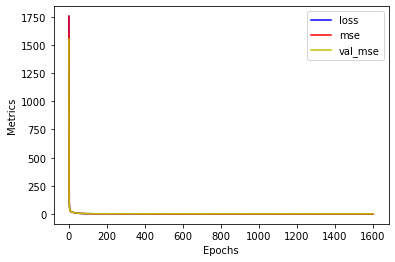

In [38]:
plt.figure()
plt.plot(a.index,a.loss,c='blue',label='loss')
plt.plot(a.index,a.mse, c='r',label='mse')

plt.plot(a.index, a.val_mse,c='y', label='val_mse')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

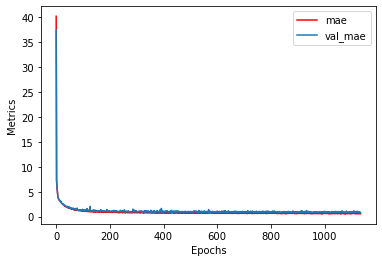

In [51]:
plt.figure()
plt.plot(a.index, a.mae,c='r', label='mae')
plt.plot(a.index, a.val_mae, label='val_mae')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

In [39]:
r2_score(y_train,model.predict(X_train))


39/39 [==============================] - 0s 4ms/step


0.9947862852020589

In [40]:
ann=pd.DataFrame(y_test)
pred=pd.DataFrame(model.predict(X_test),columns=['IFT ANN model'])

17/17 [==============================] - 0s 4ms/step


In [42]:
ann.index=pred.index
ann=pd.concat([ann,pred],axis=1)
ann.to_csv('ITF_without_phase_new_1_0.989_r2.csv')

In [43]:
model.save("IFT_Model_new_no_phase_0.989_r2.h5")

In [44]:
# if you don't like, be there!!

In [20]:
model=tf.keras.models.load_model("IFT_Model_new_no_phase_0.989_r2.h5")

In [21]:
df=pd.DataFrame(y_train) 
df

,IFT
1460,58.97
1304,35.89
687,33.80
1540,64.00
447,47.87
...,...
1142,68.52
998,55.10
1725,36.78
206,31.30


In [22]:
d2=pd.DataFrame(model.predict(X_train), columns=['IFT_pred'])
d2.index=df.index

39/39 [==============================] - 1s 3ms/step


In [24]:
df=pd.concat([df,d2],axis=1)

In [25]:
df.to_csv("ANN actual values vs Predicted values without Phase_tuned_train!.csv")